# TSP using Simulated Annealing

Importing Required Libiries

In [30]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import random
from geopy.geocoders import Nominatim

Function to Calulate Distance of the Route

In [2]:
def calculate_total_distance(solution, distance_matrix):
    total_distance = 0
    num_cities = len(solution)
    
    for i in range(num_cities - 1):
        total_distance += distance_matrix[solution[i]][solution[i + 1]]
    total_distance += distance_matrix[solution[-1]][solution[0]]  
    
    return total_distance

Function to Generate New Path either by Reversing the section or by shifting the section

In [3]:
def generate_neighbor_solution(current_solution):
    choices = ['reverse', 'shift']
    method_to_change_path = random.choice(choices)

    if method_to_change_path == 'reverse':
        # Swap two random cities to generate a neighbor solution
        neighbor_solution = current_solution.copy()
        i, j = sorted(random.sample(range(len(current_solution)), 2))
        neighbor_solution[i:j+1] = reversed(neighbor_solution[i:j+1])
    
        return neighbor_solution

    elif method_to_change_path == 'shift':
        neighbor_solution = current_solution.copy()
        i, j = sorted(random.sample(range(len(current_solution)), 2))
        cut_section = neighbor_solution[i:j]
        new_soln = neighbor_solution[:i]+ neighbor_solution[j:] 
        k = random.sample(range(len(new_soln)),1)[0]
        neighbor_solution = new_soln[:k]+ cut_section + new_soln[k:]
        return neighbor_solution

Function to calculate optimum route using Initail Temperature, and 100*N iterations or 10*N scuessfull iterations. 

In [4]:
def simulated_annealing_TSP(distance_matrix, initial_solution, initial_temperature, cooling_rate, stopping_condition):
    # Initialize current and best solutions
    current_solution = initial_solution
    best_solution = initial_solution

    # Calculate the total distance for the initial solution
    current_distance = calculate_total_distance(current_solution, distance_matrix)
    best_distance = current_distance
    current_temperature = initial_temperature
    # Initialize list to keep track of distance history
    dist = [current_distance]

    # Main annealing loop: continue until temperature drops below a certain threshold
    while current_temperature > 5:
        stopping_condition = False
        iterations = 0
        sucessfull_iterations = 0
        
        # Inner loop: explore neighboring solutions until stopping condition is met
        while not stopping_condition:
            new_solution = generate_neighbor_solution(current_solution)
            new_distance = calculate_total_distance(new_solution, distance_matrix)
            
            distance_difference = new_distance - current_distance

            # If the new solution is better (shorter distance), accept it
            if distance_difference < 0:
                current_solution = new_solution
                current_distance = new_distance
                dist.append(current_distance)
                iterations += 1
                sucessfull_iterations += 1
                if new_distance < best_distance:
                    best_solution = new_solution
                    best_distance = new_distance
            
            # If the new solution is worse, accept it with a probability -(E1 - E0)/kT   k=1
            else:
                acceptance_probability = math.exp(-distance_difference / current_temperature)
                if random.random() < acceptance_probability:
                    current_solution = new_solution
                    current_distance = new_distance
                    dist.append(current_distance)
                    iterations += 1
    
            # Cut-off conditions to stop the inner loop
            if sucessfull_iterations > 10*num_cities:
                stopping_condition = True
            elif iterations > 100*num_cities:
                stopping_condition = True
                
        # Reduce the temperature for the next iteration    
        current_temperature *= cooling_rate
        
            
    
    return best_solution, best_distance , dist


In [23]:
# Set number of nodes
num_cities = 20
random.seed(42)

#Generate a random distance matrix (replace this with your actual data)
distance_matrix = np.random.randint(1, 100, size=(num_cities, num_cities))

## Solution if Distance Matrix is constructed using random numbers

Best solution: [7, 6, 16, 18, 15, 19, 1, 0, 3, 9, 11, 4, 12, 13, 2, 5, 10, 14, 17, 8]
Best distance: 164
Total iterations: 79496


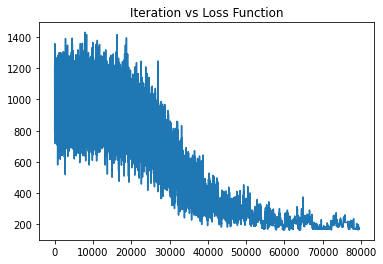

In [25]:
# Setting Initial Conditons and Printing results
initial_solution = list(range(num_cities))  
initial_temperature = 1000
cooling_rate = 0.95
stopping_condition = False

best_solution, best_distance , dist = simulated_annealing_TSP(distance_matrix, initial_solution, initial_temperature, cooling_rate, stopping_condition)

print("Best solution:", best_solution)
print("Best distance:", best_distance)
print('Total iterations:',len(dist))


plt.plot(dist)
plt.title('Iteration vs Loss Function')
plt.show()

## Distace is calculated beetween randomly generated cities in Maharashtra

In [32]:
# Define list of cities in Maharashtra
cities_in_maharashtra = ['Mumbai', 'Pune', 'Nagpur', 'Thane', 'Nashik',
    'Aurangabad', 'Solapur', 'Amravati', 'Kolhapur', 'Navi Mumbai',
    'Akola', 'Latur', 'Dhule', 'Ahmednagar', 'Jalgaon',
    'Sangli', 'Satara', 'Malegaon', 'Pusad', 'Bhiwandi']

Best solution: ['Nagpur', 'Solapur', 'Sangli', 'Nashik', 'Dhule', 'Malegaon', 'Aurangabad', 'Latur', 'Kolhapur', 'Satara', 'Bhiwandi', 'Mumbai', 'Navi Mumbai', 'Thane', 'Pune', 'Ahmednagar', 'Pusad', 'Akola', 'Jalgaon', 'Amravati']
Best distance: 31.432510146192318
Total iterations: 224300


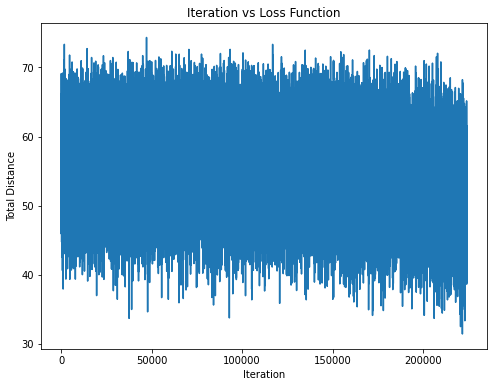

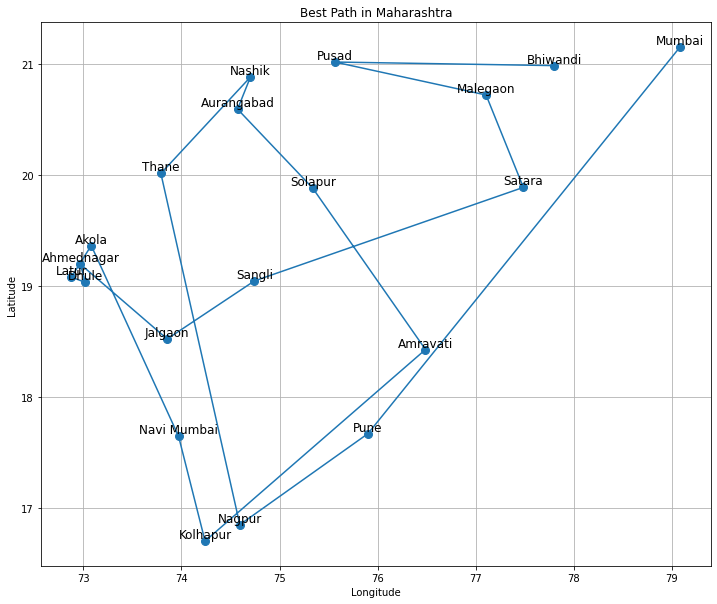

In [31]:

#Obtain city coordinates
def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="Simulated_Annealing_TSP")
    location = geolocator.geocode(city_name)
    return location.latitude, location.longitude

coordinates_of_cities = [get_coordinates(city) for city in cities_in_maharashtra]

# Calculate distance matrix
num_cities = len(cities_in_maharashtra)
distance_matrix = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(i, num_cities):
        lat1, lon1 = coordinates_of_cities[i]
        lat2, lon2 = coordinates_of_cities[j]
        distance = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

# Set initial conditions
initial_solution = list(range(num_cities))
initial_temperature = 1000
cooling_rate = 0.99
stopping_condition = False

# Run simulated annealing
best_solution, best_distance, dist = simulated_annealing_TSP(distance_matrix, initial_solution, initial_temperature, cooling_rate, stopping_condition)

print("Best solution:", [cities_in_maharashtra[i] for i in best_solution])
print("Best distance:", best_distance)
print('Total iterations:', len(dist))

# Plot the convergence graph
plt.figure(figsize=(8, 6))
plt.plot(dist)
plt.title('Iteration vs Loss Function')
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.show()

# Plot the best path on a map
plt.figure(figsize=(12, 10))
x_best = [coordinates_of_cities[i][1] for i in best_solution]  # Longitude
y_best = [coordinates_of_cities[i][0] for i in best_solution]  # Latitude

for i in range(num_cities):
    plt.text(x_best[i], y_best[i], cities_in_maharashtra[i], fontsize=12, ha='center', va='bottom')

plt.plot(x_best, y_best, marker='o', linestyle='-', markersize=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Best Path in Maharashtra')
plt.grid(True)
plt.show()